In [46]:
from itertools import islice
from sys import getsizeof
from time import process_time

import matplotlib.pyplot as plt
import osmnx
from search_optimization_tools.routing import (cost, draw_route, get_child,
                                               randomized_search)
from search_optimization_tools.structures import Node, Solution

osmnx.utils.config(requests_kwargs={"verify": False})
reference = (43.661667, -79.395)
G = osmnx.graph_from_point(reference, dist=300, clean_periphery=True, simplify=True)

# First convert the source and destination nodes to Node
origin = Node(graph=G, osmid=55808290)
destination = Node(graph=G, osmid=389677909)


In [47]:
def Hill_Climbing(G, origin, destination, k=20):
    time_start = process_time()  # Time tracking

    # Visualize the costs over time
    costs = []

    current = randomized_search(G, origin.osmid, destination.osmid)
    costs.append(cost(G, current))
    print("Initial cost:", costs[0])

    neighbours = list(islice(get_child(G, current), k))
    space_required = getsizeof(neighbours)
    shortest = min(neighbours, key=lambda route: cost(G, route))

    print("Initial min(children):", cost(G, shortest))
    while cost(G, shortest) < cost(G, current):
        current = shortest
        neighbours = list(islice(get_child(G, current), k))
        shortest = min(neighbours, key=lambda route: cost(G, route))
        costs.append(cost(G, current))
        print(f"Current cost:", costs[-1], "|", "min(children):", cost(G, shortest))

    route = current
    time_end = process_time()  # Time tracking
    return Solution(route, time_end - time_start, space_required, costs)


Initial cost: 890.843
Initial min(children): 860.999
Current cost: 860.999 | min(children): 841.835
Current cost: 841.835 | min(children): 806.892
Current cost: 806.892 | min(children): 813.0
Cost: 806.892 m
Process time: 21.546875 s
Space required: 976 bytes


Map(center=[43.6639415, -79.3922841], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

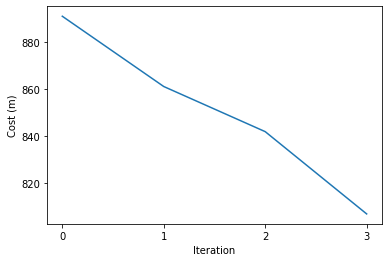

In [48]:
solution = Hill_Climbing(G, origin, destination, k=100)
route = solution.result
print(f"Cost: {cost(G,route)} m")
print(f"Process time: {solution.time} s")
print(f"Space required: {solution.space} bytes")
plt.plot(solution.explored)
plt.xticks(list(range(len(solution.explored))))
plt.ylabel("Cost (m)")
plt.xlabel("Iteration")
draw_route(G,route)